### Import and Install dependencies

In [1]:
import warnings;
warnings.simplefilter('ignore')

In [ ]:
import pandas as pd
from prophet import Prophet

### 1. Read Data and Process Dates

In [3]:
dataset = pd.read_csv('dataset.csv')

In [4]:
dataset.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [5]:
## checking the uniqueness of my values
print(dataset['Product'].unique())
print(dataset['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [6]:
#extracting the date from raw data
dataset['Year']= dataset['Time Date'].apply(lambda x:str(x)[-4:])
dataset['Month']= dataset['Time Date'].apply(lambda x:str(x)[-6:-4])
dataset['Day'] = dataset['Time Date'].apply(lambda x:str(x)[:-6])
dataset ['ds'] = pd.DatetimeIndex(dataset['Year']+'-'+dataset['Month']+'-'+dataset['Day'])

In [7]:
dataset.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [8]:
dataset.drop(['Time Date','Product','Store','Year','Month','Day'], axis = 1 ,inplace=True)

In [9]:
dataset.columns = ['y','ds']

### 2. Model Training with Prophet and Forecasting

In [11]:
m = Prophet(interval_width= 0.95, daily_seasonality = True)
model = m.fit(dataset)

Initial log joint probability = -33.1653
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1946.15     0.0011125       107.664           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     195       1946.39    0.00142368       166.991   1.425e-05       0.001      285  LS failed, Hessian reset 
     199       1946.42   5.79081e-05       36.1065      0.3903      0.3903      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       1946.43   8.04272e-05       78.8924   1.208e-06       0.001      364  LS failed, Hessian reset 
     264       1946.44   6.00866e-06       62.1111   7.385e-08       0.001      445  LS failed, Hessian reset 
     299       1946.44   2.06358e-05       79.4759           1           1      498   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

In [12]:
future = m.make_future_dataframe(periods= 100, freq = 'D')
forecast = m.predict (future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.639554,792.045782,3874.198554,3041.639554,3041.639554,-641.457993,-641.457993,-641.457993,468.311342,...,16.625775,16.625775,16.625775,-1126.395110,-1126.395110,-1126.395110,0.0,0.0,0.0,2400.181562
1,2018-01-02,3042.400868,863.323068,3911.634628,3042.400868,3042.400868,-651.546659,-651.546659,-651.546659,468.311342,...,-11.277196,-11.277196,-11.277196,-1108.580805,-1108.580805,-1108.580805,0.0,0.0,0.0,2390.854209
2,2018-01-03,3043.162182,960.412046,3918.453530,3043.162182,3043.162182,-625.677575,-625.677575,-625.677575,468.311342,...,-4.405334,-4.405334,-4.405334,-1089.583583,-1089.583583,-1089.583583,0.0,0.0,0.0,2417.484606
3,2018-01-04,3043.923496,938.226270,3966.688313,3043.923496,3043.923496,-578.695170,-578.695170,-578.695170,468.311342,...,22.473750,22.473750,22.473750,-1069.480262,-1069.480262,-1069.480262,0.0,0.0,0.0,2465.228326
4,2018-01-05,3044.684809,908.977912,4007.824859,3044.684809,3044.684809,-614.673707,-614.673707,-614.673707,468.311342,...,-34.584711,-34.584711,-34.584711,-1048.400338,-1048.400338,-1048.400338,0.0,0.0,0.0,2430.011102


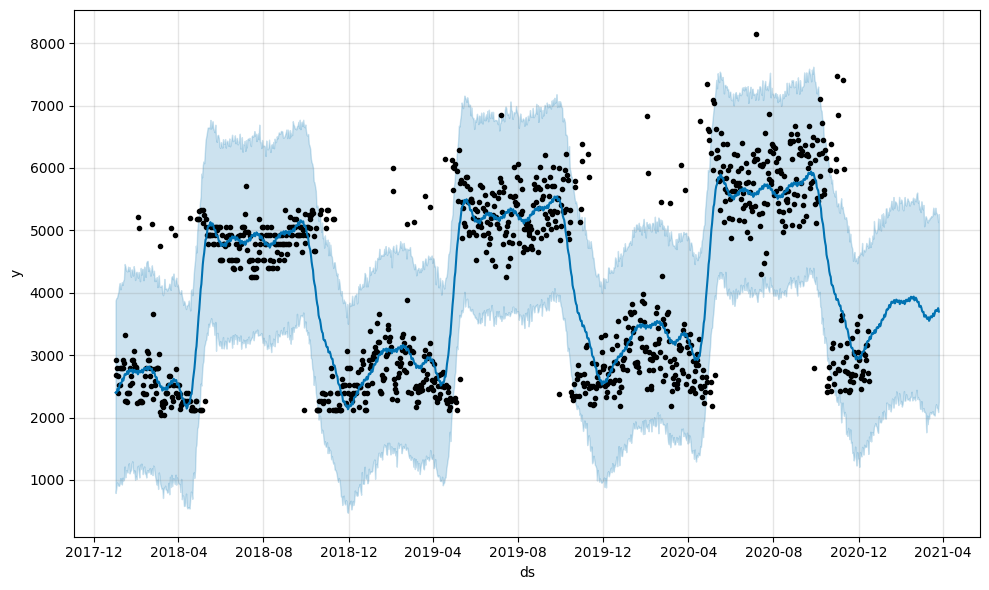

In [13]:
plot1 = m.plot(forecast)